# Concevez une application au service de la santé publique

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration-du-Notebook-de-Nettoyage" data-toc-modified-id="Configuration-du-Notebook-de-Nettoyage-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration du Notebook de Nettoyage</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies-utilisées" data-toc-modified-id="Importation-des-librairies-utilisées-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importation des librairies utilisées</a></span></li><li><span><a href="#Définition-des-variables-utilisées-par-la-suite" data-toc-modified-id="Définition-des-variables-utilisées-par-la-suite-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Définition des variables utilisées par la suite</a></span></li><li><span><a href="#Importation-de-la-base-de-donnée-OpenFoodFacts" data-toc-modified-id="Importation-de-la-base-de-donnée-OpenFoodFacts-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Importation de la base de donnée OpenFoodFacts</a></span></li></ul></li><li><span><a href="#Idée-d'application-:-détermination-du-Nutrition-score" data-toc-modified-id="Idée-d'application-:-détermination-du-Nutrition-score-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Idée d'application : détermination du Nutrition score</a></span></li><li><span><a href="#Tri-des-variables-par-remplissage" data-toc-modified-id="Tri-des-variables-par-remplissage-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tri des variables par remplissage</a></span></li><li><span><a href="#Choix-des-variables-pertinentes" data-toc-modified-id="Choix-des-variables-pertinentes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Choix des variables pertinentes</a></span><ul class="toc-item"><li><span><a href="#PNNS-Group-(Programme-National-Nutrition-Santé)" data-toc-modified-id="PNNS-Group-(Programme-National-Nutrition-Santé)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>PNNS Group (Programme National Nutrition Santé)</a></span></li><li><span><a href="#Nova-Group" data-toc-modified-id="Nova-Group-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Nova Group</a></span></li><li><span><a href="#Composants-sur-100g" data-toc-modified-id="Composants-sur-100g-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Composants sur 100g</a></span></li></ul></li></ul></div>

## Configuration du Notebook de Nettoyage
### Importation des librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Définition des variables utilisées par la suite 
Dans ce projet nous avons pour idée initiale d'étudier le Nutriscore et le Nova Group pour chacune des catégories de produits nutritionnels nationnales (PNNS Group). Nous allons donc restreindre nos variables d'études aux variables qui nous intéressent pour étudier cette problématique.

In [2]:
var_interessante = ['code','product_name', 'pnns_groups_1', 'nova_group','energy_100g','energy-kcal_100g','proteins_100g', 'fat_100g', 
                    'carbohydrates_100g','sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g','nutrition-score-fr_100g', 
                    'fiber_100g','calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g', 'additives_n']
cat_pnns = ['Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish Meat Eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks']

### Importation de la base de donnée OpenFoodFacts

In [3]:
dataOpenFoodFacts = pd.read_csv('./openfoodfacts_data_new.csv', sep='\t')

C:\Users\maxim\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,12,18,19,20,21,22,26,27,28,30,51,63) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
dataOpenFoodFacts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Idée d'application : détermination du Nutrition score 
Pour cette étude nous avons décider de travailler sur le nutriscore des produits. Le but est, lorsque celui-ci n'est pas renseigné, à définir une méthode permettant d'attribuer un nutriscore adapté. 

Nous allons pour cela nous essayer au Machine Learning et nnotamment à la librairie Sklearn qui propose des applications simples d'algorithmes. 

Regardons dans un premier temps comment est rempli le data set qui nous est mis à disposition afin de faire le tri parmis toutes les variables disponibles.

## Tri des variables par remplissage
Nous décidons de réaliser cette étude en prenant en compte principalement le remplissage de la base comment facteur principal. Notre hypothèse est que plus nous aurons de données, plus l'application sera pertinente. 
Nous réalisons donc dans un premiers temps une étude de remplissage de la base complète afin de voir quelles sont les variables les plus remplies qui sont les plus intéressantes. 

Nous commençons pas supprimer les doublons qui ont les mêmes codes barres et noms de produit et gardons à chaque fois le premier trouvé. 

In [5]:
dataOpenFoodFacts = dataOpenFoodFacts.drop_duplicates(['code','product_name'], keep='first')

In [6]:
df_missing_values = dataOpenFoodFacts.isnull().sum().divide(dataOpenFoodFacts.shape[0]).multiply(100)
df_missing_values = df_missing_values.sort_values()

unused_col = ["url","_tags","_en","_datetime","_t"]
for col in unused_col :
    df_missing_values = df_missing_values[df_missing_values.index.str.endswith(col, na=False) == False] 

In [7]:
print( "Le taux de remplissage moyen est de", 100-df_missing_values.mean() ,"%.")

Le taux de remplissage moyen est de 15.091687394481028 %.


In [8]:
df_missing_values = df_missing_values[df_missing_values <= df_missing_values.mean()]
df_missing_values.shape

(38,)

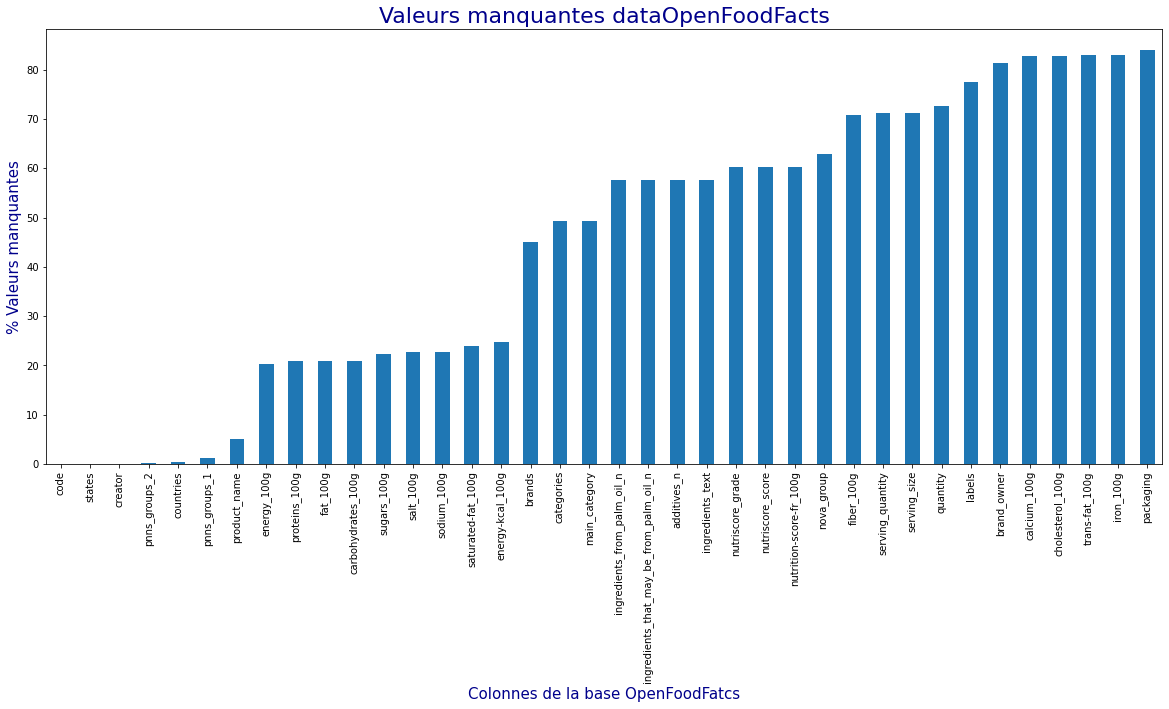

In [9]:
plt.figure(figsize=(20,8))
plt.title("Valeurs manquantes dataOpenFoodFacts", fontsize=22, color='darkblue')
plt.xlabel("Colonnes de la base OpenFoodFatcs", fontsize=15, color='darkblue')
plt.ylabel("% Valeurs manquantes", fontsize=15,color='darkblue')
df_missing_values.plot(kind="bar")

In [10]:
df_missing_values.index

Index(['code', 'states', 'creator', 'pnns_groups_2', 'countries',
       'pnns_groups_1', 'product_name', 'energy_100g', 'proteins_100g',
       'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'salt_100g',
       'sodium_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'brands',
       'categories', 'main_category', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'additives_n',
       'ingredients_text', 'nutriscore_grade', 'nutriscore_score',
       'nutrition-score-fr_100g', 'nova_group', 'fiber_100g',
       'serving_quantity', 'serving_size', 'quantity', 'labels', 'brand_owner',
       'calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g',
       'packaging'],
      dtype='object')

## Choix des variables pertinentes
Pour ce projet nous sommes intéressés par le Nutriscore. Regardons les autres variables et voyons leur pertinence pour notre étude.

**states, creator, countries, product_name, brands, ingredients_text, serving_quantity, serving_size, quantity, labels, brand_owner & packaging** sont des variables qui n'ont pas de rapport avec le **nutriscore**. Nous retirons dès à présent ces variables de notre dataset.

Nous gardons tout de même **code** qui nous permet d'identifier chaque produit car il est renseigné à 100%.

In [11]:
unused_col_2 = ["states", "creator", "countries", "product_name", "brands", "ingredients_text", "serving_quantity", 
                "serving_size", "quantity", "labels","brand_owner", "packaging"]
for col in unused_col_2 :
    df_missing_values = df_missing_values[df_missing_values.index.str.endswith(col, na=False) == False] 

In [12]:
dataEtude = dataOpenFoodFacts[df_missing_values.index]

In [13]:
dataEtude.columns

Index(['code', 'pnns_groups_2', 'pnns_groups_1', 'energy_100g',
       'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'salt_100g', 'sodium_100g', 'saturated-fat_100g', 'energy-kcal_100g',
       'categories', 'main_category', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'additives_n',
       'nutriscore_grade', 'nutriscore_score', 'nutrition-score-fr_100g',
       'nova_group', 'fiber_100g', 'calcium_100g', 'cholesterol_100g',
       'trans-fat_100g', 'iron_100g'],
      dtype='object')

### PNNS Group (Programme National Nutrition Santé)
Nous avons dans la base 2 variables présentes : **pnns_groups_1 & pnns_groups_2**.

Nous allons voir comment elles sont constituées puis regarder si chaque produit a une catégorie attribuée. Voyons comment nos produits sont répartis dans les catégories. 

In [14]:
dataEtude.pnns_groups_1.value_counts()

unknown                    913728
Sugary snacks              132262
Milk and dairy products     80989
Fish Meat Eggs              79690
Cereals and potatoes        73344
Fat and sauces              62483
Beverages                   60774
Composite foods             49344
Fruits and vegetables       42684
Salty snacks                29576
fruits-and-vegetables        7036
sugary-snacks                4907
cereals-and-potatoes           52
salty-snacks                    5
Name: pnns_groups_1, dtype: int64

In [15]:
dataEtude['pnns_groups_1'] = dataEtude['pnns_groups_1'].replace(['fruits-and-vegetables','sugary-snacks','cereals-and-potatoes', 'salty-snacks'],
                                                                ['Fruits and vegetables','Sugary snacks','Cereals and potatoes', 'Salty snacks'])

<ipython-input-15-63e9dd6eead3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataEtude['pnns_groups_1'] = dataEtude['pnns_groups_1'].replace(['fruits-and-vegetables','sugary-snacks','cereals-and-potatoes', 'salty-snacks'],


In [16]:
dataEtude.pnns_groups_2.value_counts()

unknown                             913728
Sweets                               61519
Biscuits and cakes                   57713
Dressings and sauces                 44602
Cheese                               39219
One-dish meals                       39025
Cereals                              35348
Processed meat                       30221
Milk and yogurt                      30046
Meat                                 23776
Fish and seafood                     21515
Sweetened beverages                  20250
Vegetables                           20187
Bread                                19916
Fats                                 17881
Fruits                               14926
Alcoholic beverages                  14359
Chocolate products                   13030
Salty and fatty products             12795
Appetizers                           10210
Unsweetened beverages                 9881
Artificially sweetened beverages      8682
Fruit juices                          8110
Breakfast c

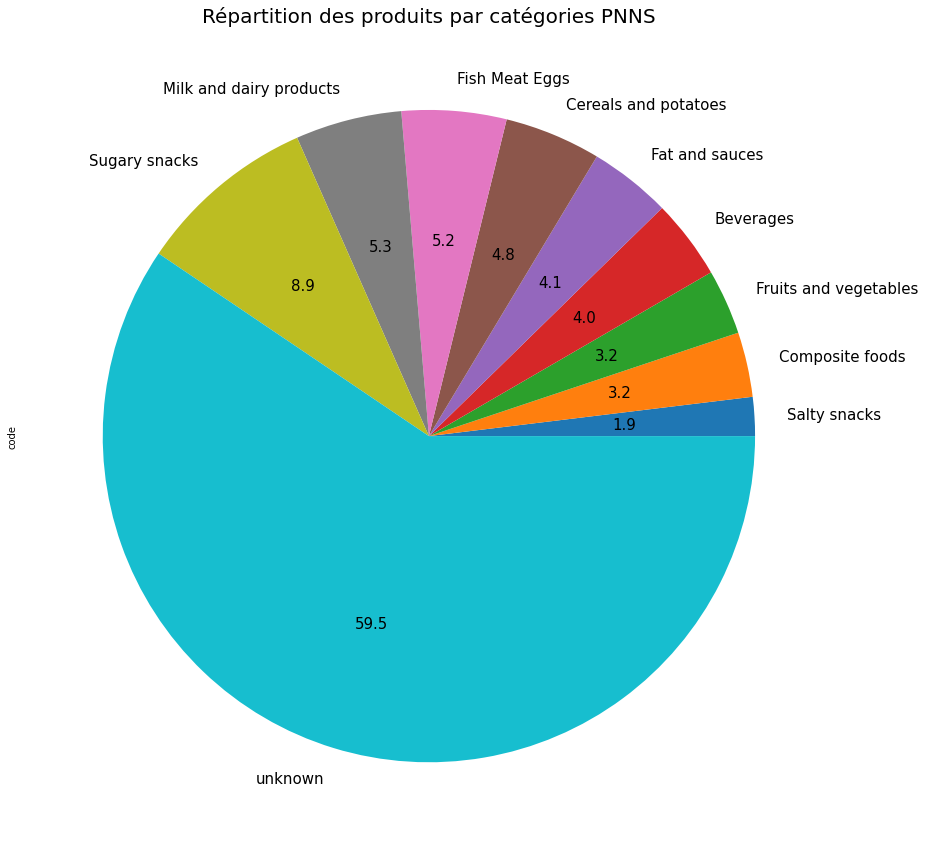

In [17]:
plt.figure()
plt.title("Répartition des produits par catégories PNNS", fontsize=20)
pnns_effectif = dataEtude.groupby("pnns_groups_1")["code"].count().sort_values()
pnns_effectif.plot.pie(labels=pnns_effectif.index, autopct="%.1f", fontsize=15, figsize=(15,15))

Nous observons ici que pour les deux variables de PNNS nous avons le même compte de "unknown" qui est la catégorie indiquée lorsque celle-ci n'est pas connue. **pnns_groups_1** comporte des catégories plus synthétiques, plus générales, tandis que **pnns_groups_2** est plus détaillé car il est composé de catégories plus fines avec un nom plus précis. 

Visualisons avec **pnns_groups_1** comment sont réparties les produits selon les catégories plus générales.

### Nova Group

In [18]:
dataEtude.nova_group.value_counts()

4.0    385332
3.0    119690
1.0     61660
2.0     11029
Name: nova_group, dtype: int64

In [19]:
print (dataEtude.nova_group.count(), ' valeurs de Nova Group sont renseignées parmis', dataEtude.code.count(), 'soit',(dataEtude.nova_group.count()/dataEtude.code.count()*100).round(2),'%.' )

577711  valeurs de Nova Group sont renseignées parmis 1555419 soit 37.14 %.


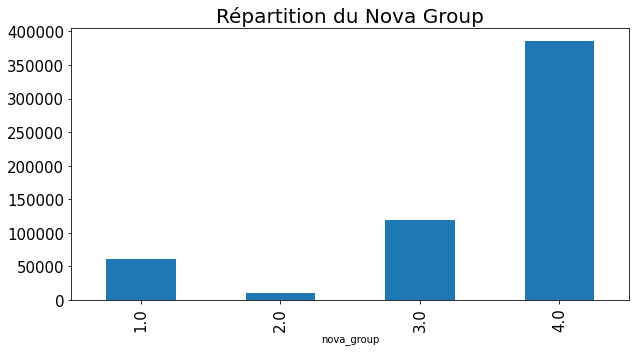

In [20]:
plt.figure()
plt.title("Répartition du Nova Group", fontsize=20)
nova_effectif = dataEtude.groupby("nova_group")["code"].count()
nova_effectif.plot(kind="bar",fontsize=15, figsize=(10, 5))

### Composants sur 100g
Nous retrouvons dans le dataset tout une liste d'ingrédients ou composants du produit renseignés par 100g. Regardons les valeurs que prennent chacun d'entre eux afin d'identifier de potentielles valeurs aberrantes.

**'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g','sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g','energy-kcal_100g', 'nutrition-score-fr_100g', 'fiber_100g','calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g'**

In [21]:
composants_100g = dataEtude.columns[dataEtude.columns.str.endswith('100g', na=False) == True]
composants_100g

Index(['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'nutrition-score-fr_100g', 'fiber_100g',
       'calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g'],
      dtype='object')

In [22]:
dataEtude[composants_100g].describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,energy-kcal_100g,nutrition-score-fr_100g,fiber_100g,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g
count,1.239139e+06,1.230653e+06,1.229586e+06,1.229023e+06,1.208082e+06,1.202345e+06,1.202340e+06,1.183491e+06,1.171589e+06,617034.000000,454511.000000,269001.000000,268071.000000,264164.000000,264102.000000
mean,5.379186e+36,8.518154e+00,1.374580e+01,2.839653e+01,1.371050e+01,1.781914e+00,7.128082e-01,1.149143e+08,7.429380e+06,9.149177,2.969723,0.172051,0.047466,0.046701,0.006815
std,5.987928e+39,1.084832e+01,9.208736e+01,2.921085e+01,2.001883e+01,7.407096e+01,2.962614e+01,1.250134e+11,8.032025e+09,8.901763,6.309351,4.800280,1.370074,1.061482,0.326330
min,0.000000e+00,-5.000000e+02,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-15.000000,-20.000000,0.000000,0.000000,0.000000,-0.000260
25%,4.180000e+02,1.204819e+00,7.000000e-01,3.570000e+00,7.000000e-01,6.000000e-02,2.400000e-02,1.000000e-01,1.010000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.088000e+03,5.900000e+00,7.000000e+00,1.550000e+01,3.800000e+00,5.450000e-01,2.180000e-01,1.900000e+00,2.630000e+02,10.000000,1.600000,0.036000,0.000000,0.000000,0.001000
75%,1.674000e+03,1.200000e+01,2.143000e+01,5.351500e+01,1.930000e+01,1.375000e+00,5.500000e-01,7.200000e+00,4.000000e+02,16.000000,3.600000,0.109000,0.022000,0.000000,0.002400
max,6.665559e+42,2.500000e+03,1.000001e+05,5.310000e+03,1.350000e+03,6.670000e+04,2.670000e+04,1.360000e+14,8.693855e+12,40.000000,2020.000000,930.000000,141.000000,369.000000,100.000000


**'energy_100g' et 'energy-kcal_100g'** ne sont pas des variables ayant des valeurs entre 0 et 100g, elles sont en kJ ou kcal. De même manière, le **'nutrition-score-fr_100g'** est noté entre -15 et 40. Nous les mettons donc de côté et analysons les reste des variables sur 100g. 

In [23]:
composants_100g=['proteins_100g', 'fat_100g', 'carbohydrates_100g','sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
                 'fiber_100g','calcium_100g', 'cholesterol_100g', 'trans-fat_100g', 'iron_100g']

proteins_100g            AxesSubplot(0.125,0.657941;0.168478x0.222059)
fat_100g              AxesSubplot(0.327174,0.657941;0.168478x0.222059)
carbohydrates_100g    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
sugars_100g           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
salt_100g                AxesSubplot(0.125,0.391471;0.168478x0.222059)
sodium_100g           AxesSubplot(0.327174,0.391471;0.168478x0.222059)
saturated-fat_100g    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
fiber_100g            AxesSubplot(0.731522,0.391471;0.168478x0.222059)
calcium_100g                AxesSubplot(0.125,0.125;0.168478x0.222059)
cholesterol_100g         AxesSubplot(0.327174,0.125;0.168478x0.222059)
trans-fat_100g           AxesSubplot(0.529348,0.125;0.168478x0.222059)
iron_100g                AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

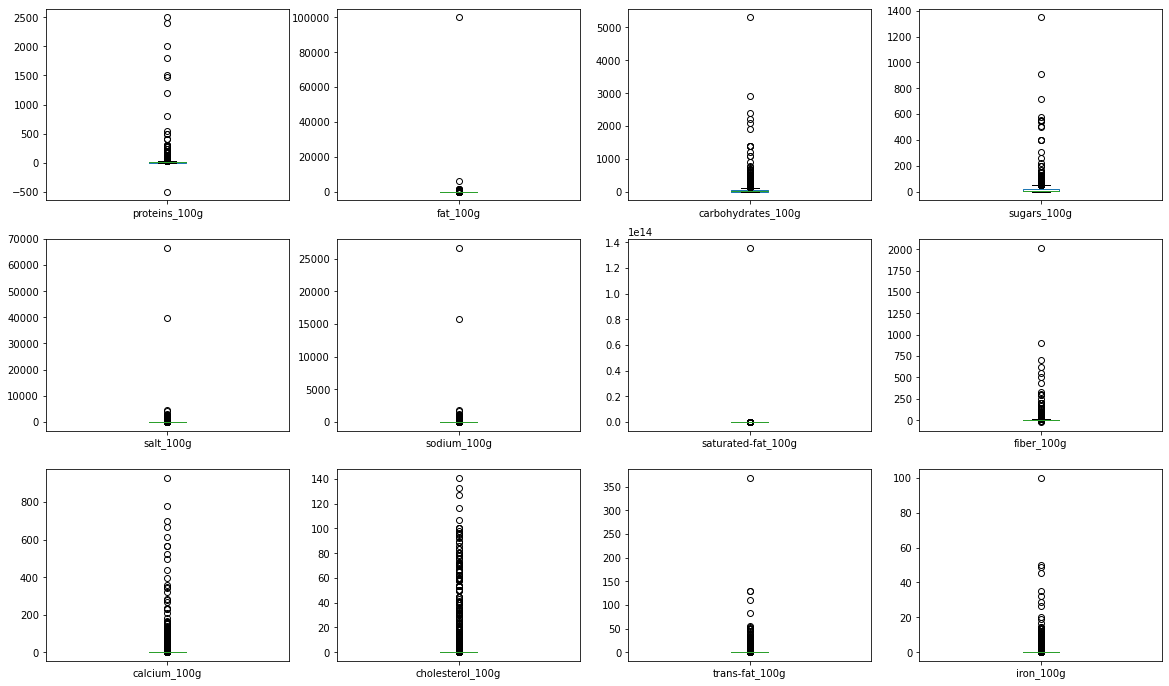

In [24]:
dataEtude[composants_100g].plot.box(subplots=True, layout=(3, 4), figsize=(20, 12), sharex=False)

Nous remarquons que beaucoup de composants comportent des valeurs aberrantes qui sont supérieures à 100g. Nous décidons de les compter afin de voir lesquels retirer de notre dataset.

In [25]:
for comp in composants_100g :
   print(comp ,"contient :", dataEtude[dataEtude[comp] > 100].shape[0], "valeurs supérieures à 100 et", dataEtude[dataEtude[comp] < 0].shape[0], "valeurs négatives.") 

proteins_100g contient : 41 valeurs supérieures à 100 et 2 valeurs négatives.
fat_100g contient : 52 valeurs supérieures à 100 et 0 valeurs négatives.
carbohydrates_100g contient : 118 valeurs supérieures à 100 et 0 valeurs négatives.
sugars_100g contient : 39 valeurs supérieures à 100 et 2 valeurs négatives.
salt_100g contient : 638 valeurs supérieures à 100 et 0 valeurs négatives.
sodium_100g contient : 372 valeurs supérieures à 100 et 0 valeurs négatives.
saturated-fat_100g contient : 20 valeurs supérieures à 100 et 0 valeurs négatives.
fiber_100g contient : 25 valeurs supérieures à 100 et 12 valeurs négatives.
calcium_100g contient : 62 valeurs supérieures à 100 et 0 valeurs négatives.
cholesterol_100g contient : 5 valeurs supérieures à 100 et 0 valeurs négatives.
trans-fat_100g contient : 4 valeurs supérieures à 100 et 0 valeurs négatives.
iron_100g contient : 0 valeurs supérieures à 100 et 1 valeurs négatives.


Nous retirons toutes les lignes contenant des valeurs > 100g ou négatives afin de pouvoir observer la distribution de ces variables.

In [26]:
data_propre = pd.DataFrame()

for col in composants_100g:
    data_propre[col] = dataEtude.loc[((dataEtude[col] <= 100) & (dataEtude[col] >= 0)),col]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D86D2D0D0>,
      dtype=object)

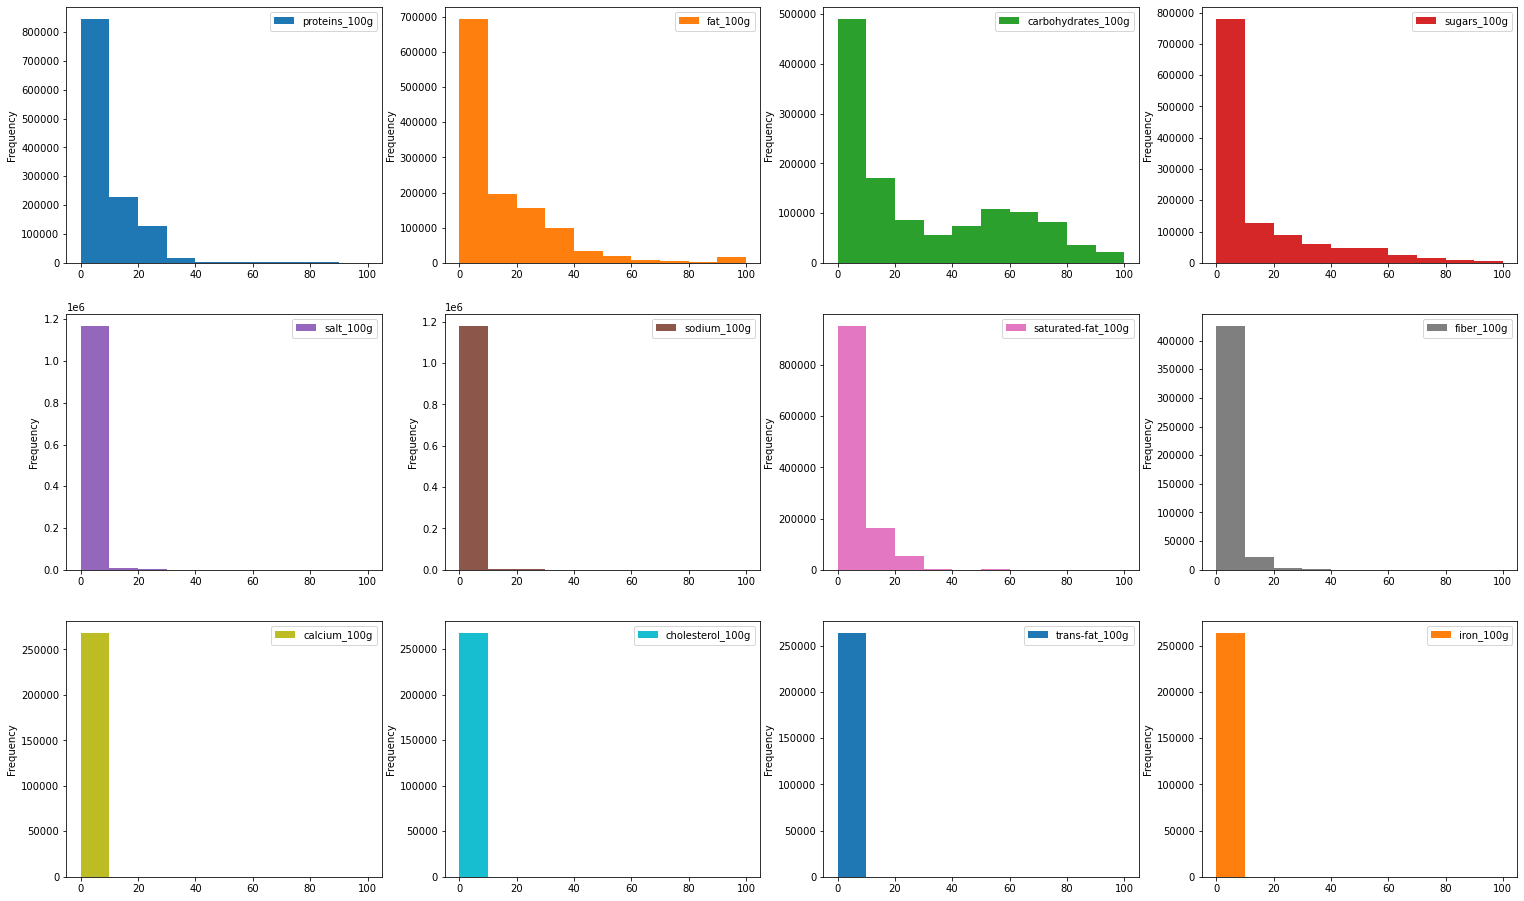

In [27]:
data_propre[composants_100g].plot.hist(subplots=True, layout=(3, 4), figsize=(26, 16), sharex=False)

In [28]:
data_final = dataOpenFoodFacts[var_interessante]
data_final = data_final.drop_duplicates(['code','product_name'])
data_final = data_final.loc[data_propre.index]
data_final.reset_index(drop=True, inplace=True)

In [29]:
data_final

,code,product_name,pnns_groups_1,nova_group,energy_100g,energy-kcal_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,nutrition-score-fr_100g,fiber_100g,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,additives_n
0,0000000000017,Vitória crackers,unknown,NaN,1569.0,375.0,7.8,7.0,70.1,15.0,1.40,0.560,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000100,moutarde au moût de raisin,Fat and sauces,NaN,936.0,NaN,5.1,8.2,29.0,22.0,4.60,1.840,2.20,18.0,0.0,NaN,NaN,NaN,NaN,0.0
2,0000000000123,Sauce Sweety chili 0%,unknown,NaN,88.0,21.0,0.2,0.0,4.8,0.4,2.04,0.816,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,Mini coco,unknown,NaN,251.0,60.0,2.0,3.0,10.0,3.0,1.15,0.460,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,Salade de carottes râpées,Composite foods,NaN,134.0,32.0,0.9,0.3,5.3,3.9,0.42,0.168,0.10,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230605,9999999004360,Minis beignets,unknown,NaN,1393.0,333.0,7.4,20.2,30.9,10.4,1.10,0.440,6.00,15.0,NaN,NaN,NaN,NaN,NaN,NaN
1230606,9999999175305,Erdbeerkuchen 1019g tiefgefroren,Sugary snacks,4.0,925.0,NaN,2.6,7.6,35.0,24.0,0.28,0.112,4.80,12.0,NaN,NaN,NaN,NaN,NaN,2.0
1230607,99999995,Steak haché pur boeuf,Fish Meat Eggs,NaN,548.0,131.0,21.5,5.0,0.0,0.0,0.18,0.072,2.30,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
1230608,9999999901,Scs,unknown,NaN,418.0,100.0,1.0,12.0,2.0,1.0,1.00,0.400,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous enregistrons désormais note dataset en fichier CSV, prêt à être exploré plus en détail pour répondre au besoin de notre choix d'application. 

In [30]:
data_final.to_csv('./openfoodfacts_clean.csv')

Rendez-vous pour la suite du projet dans le Notebook d'exploration !